Setting up iPython

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

Create a sample Brownian path using i.i.d. normal noise.

In [2]:
#Normal Increments
noiseT = lambda N,T: np.random.normal(0,sqrt(T/float(N)),N)

# Number of time steps:
N = 100000
t = np.linspace(0,1,N+1) # time discretisation
# append a 0 to the start of the noise vector, and compute the cumulative sum:
W = cumsum(np.hstack((arange(1),noiseT(N,1))))

Functions to compute the It&ocirc; and Stratonovich integrals for $\int_0^1 W_s\, \mathrm{d}W_s$.

In [3]:
def Ito(W):
        "This computes the Ito integral of W against itself"
        M = W.size
        I2 = W[0:(M-1)]*np.diff(W[0:(M+1)])
        return cumsum(I2)
        
# NB: to get the value at the midpoint, we can only compute 
#    the difference between 0,2,4,...
def Strat(W):
        "This computes the Stratonovich integral of W against itself"
        M = W.size
        J2 = W[1:(M+1):2]*np.diff(W[0:(M+1):2])
        return cumsum(J2)

# To make the comparison at equivalent discretisations, we only 
#    consider W at alternate points for the Ito integral        
I = Ito(W[0:size(W):2])
J = Strat(W)

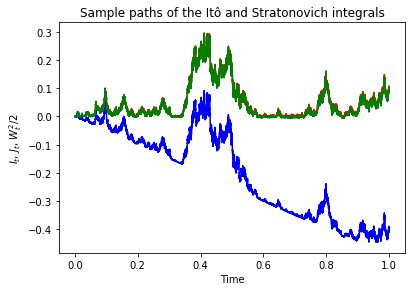

In [4]:
%matplotlib inline

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(t, W*W/2, 'r')
axes.plot(t[0:(size(t)-2):2], I, 'b')
axes.plot(t[0:(size(t)-2):2], J, 'g')

axes.set_xlabel(r'Time')
axes.set_ylabel(r'$I_t$, $J_t$, $W_t^2/2$')
axes.set_title(u'Sample paths of the Itô and Stratonovich integrals');

Note that the red curve of $\frac{W_t^2}{2}$ is barely visible behind the green curve, which is the Stratonovich integral.

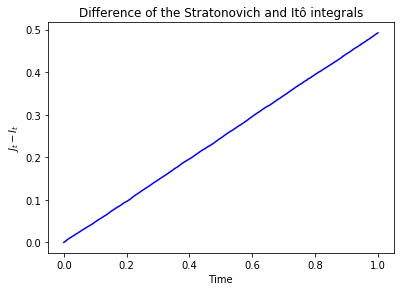

In [5]:
%matplotlib inline

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(t[0:(size(t)-2):2], J-I, 'b')
axes.set_xlabel(r'Time')
axes.set_ylabel(r'$J_t - I_t$')
axes.set_title(u'Difference of the Stratonovich and Itô integrals');

As might have been guessed, the difference between the It&ocirc; and Stratonovich integrals is $t/2$. This is slightly different to the result in lectures: in the lectures, we showed that taking the right-hand endpoint of the interval gives a difference of $t$ between this integral and the It&ocirc; integrals. Numerically, this confirms the intuition that taking the mid-point is 'inbeetween' these two cases.